In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import uproot
import json
import yaml
from glob import glob

In [2]:
with open('../configs/training_v1.yaml') as f:
    scaling_dict = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
TauFlat_normal_features = []
for feature_dict in scaling_dict['Features_all']['TauFlat']:
    feature = list(feature_dict.keys())[0]
    if feature_dict[feature][2] == 'normal':
        TauFlat_normal_features.append(feature)

In [4]:
file_names = sorted(glob('output_json/*.json'))
nfiles = len(file_names)
file_names

['output_json/scaling_params_v0_log_0.json',
 'output_json/scaling_params_v0_log_1.json',
 'output_json/scaling_params_v0_log_2.json',
 'output_json/scaling_params_v0_log_3.json',
 'output_json/scaling_params_v0_log_4.json',
 'output_json/scaling_params_v0_log_5.json',
 'output_json/scaling_params_v0_log_7.json',
 'output_json/scaling_params_v0_log_8.json']

In [5]:
with open(file_names[0]) as f:
    var_types = json.load(f).keys()
var_types

dict_keys(['TauFlat', 'PfCand_electron', 'PfCand_muon', 'PfCand_chHad', 'PfCand_nHad', 'PfCand_gamma', 'Electron', 'Muon'])

In [6]:
cone_type = 'inner'
mean_dict = {var_type: [] for var_type in var_types}
std_dict = {var_type: [] for var_type in var_types}
for i, file_name in enumerate(file_names):
    with open(file_name) as f:
        scalings = json.load(f)
    for var_type in scalings.keys():
        mean, std = {}, {}
        for i, (feature, feature_scaling) in enumerate(scalings[var_type].items()):
            if var_type == 'TauFlat':
                if feature in TauFlat_normal_features:
                    mean[feature] = feature_scaling['mean']
                    std[feature] = feature_scaling['std']
            else:
                if cone_type not in feature_scaling: continue
                mean[feature] = feature_scaling[cone_type]['mean']
                std[feature] = feature_scaling[cone_type]['std']   
        mean_dict[var_type].append(mean) 
        std_dict[var_type].append(std)

In [7]:
df_mean_dict = {var_type: pd.DataFrame(mean_dict[var_type]) for var_type in var_types}
df_std_dict = {var_type: pd.DataFrame(std_dict[var_type]) for var_type in var_types}

In [8]:
var_types

dict_keys(['TauFlat', 'PfCand_electron', 'PfCand_muon', 'PfCand_chHad', 'PfCand_nHad', 'PfCand_gamma', 'Electron', 'Muon'])

In [9]:
var_type = 'Electron'

In [10]:
df_mean_dict[var_type]

,ele_rel_pt,ele_cc_ele_rel_energy,ele_cc_gamma_rel_energy,ele_cc_n_gamma,ele_rel_trackMomentumAtVtx,ele_rel_trackMomentumAtCalo,ele_rel_trackMomentumOut,ele_rel_trackMomentumAtEleClus,ele_rel_trackMomentumAtVtxWithConstraint,ele_rel_ecalEnergy,...,ele_deltaPhiSeedClusterTrackAtCalo,ele_mvaInput_sigmaEtaEta,ele_mvaInput_hadEnergy,ele_mvaInput_deltaEta,ele_gsfTrack_normalizedChi2,ele_gsfTrack_numberOfValidHits,ele_rel_gsfTrack_pt,ele_gsfTrack_pt_sig,ele_closestCtfTrack_normalizedChi2,ele_closestCtfTrack_numberOfValidHits
0,0.983167,1.847976,0.103549,1.864577,2.620239,2.620246,1.045616,1.045620,1.771856,2.111969,...,0.000255,0.000659,25.502053,0.004056,2.686784,16.640226,2.568546,4.680336,2.721703,15.542681
1,0.981647,1.842916,0.103041,1.871939,2.062032,2.062045,0.917806,0.917809,1.795158,2.107233,...,0.000268,0.000612,25.733632,0.003858,2.679885,16.636165,2.855993,4.683579,2.779153,15.547426
2,0.981652,1.842255,0.103390,1.873769,2.012804,2.012563,0.917104,0.917107,1.796714,2.106629,...,0.000244,0.000610,25.714530,0.003865,2.679577,16.633822,2.887615,4.684200,2.765506,15.539623
3,0.981833,1.842197,0.103335,1.871287,1.975037,1.974904,0.947158,0.947139,1.793026,2.106558,...,0.000269,0.000609,25.737797,0.003868,2.682378,16.635935,2.754444,4.684202,2.768128,15.541777
4,0.982150,1.842946,0.103322,1.871953,2.053133,2.053050,0.938419,0.938406,1.790660,2.107409,...,0.000261,0.000612,25.721819,0.003869,2.682772,16.635374,2.815321,4.683299,2.772582,15.540820
5,0.982201,1.842725,0.103267,1.872179,2.044635,2.044575,0.936892,0.936881,1.788541,2.106903,...,0.000262,0.000611,25.742977,0.003878,2.682938,16.635931,3.032681,4.683138,2.770486,15.543141
6,0.982148,1.842921,0.103203,1.872096,2.010329,2.010288,0.944250,0.944242,1.786339,2.106992,...,0.000277,0.000611,25.735882,0.003883,2.681080,16.635945,3.010981,4.682414,2.766521,15.540859
7,0.982164,1.842948,0.103172,1.871595,1.996959,1.996925,0.940623,0.940617,1.786518,2.106939,...,0.000271,0.000610,25.713770,0.003891,2.681347,16.635949,2.951309,4.682335,2.767559,15.540505


In [11]:
df_std_dict[var_type]

,ele_rel_pt,ele_cc_ele_rel_energy,ele_cc_gamma_rel_energy,ele_cc_n_gamma,ele_rel_trackMomentumAtVtx,ele_rel_trackMomentumAtCalo,ele_rel_trackMomentumOut,ele_rel_trackMomentumAtEleClus,ele_rel_trackMomentumAtVtxWithConstraint,ele_rel_ecalEnergy,...,ele_deltaPhiSeedClusterTrackAtCalo,ele_mvaInput_sigmaEtaEta,ele_mvaInput_hadEnergy,ele_mvaInput_deltaEta,ele_gsfTrack_normalizedChi2,ele_gsfTrack_numberOfValidHits,ele_rel_gsfTrack_pt,ele_gsfTrack_pt_sig,ele_closestCtfTrack_normalizedChi2,ele_closestCtfTrack_numberOfValidHits
0,0.621886,1.116107,0.252563,2.033421,224.671280,224.671280,42.051942,42.051942,2.692718,1.269907,...,0.045237,0.006480,79.951371,0.038030,8.725386,2.725706,61.085203,2.315821,8.695497,5.050009
1,0.615565,1.114624,0.251602,2.038918,93.807042,93.807042,17.095175,17.095175,6.982794,1.265196,...,0.044224,0.004345,81.494648,0.033709,11.412520,2.726404,184.682709,2.297240,8.956990,5.046141
2,0.617335,1.139403,0.252344,2.041334,72.212418,72.211401,15.636472,15.636472,11.712327,1.262805,...,0.044430,0.004186,81.340054,0.033909,11.045607,2.727052,179.093072,2.316648,8.892034,5.051981
3,0.614395,1.129840,0.252347,2.040363,59.449164,59.448381,33.929945,33.929931,10.321317,1.263076,...,0.044360,0.004206,81.226468,0.033896,11.285790,2.727335,145.336795,2.306303,8.895032,5.052030
4,0.620248,1.126876,0.252236,2.041667,172.855670,172.855473,31.243393,31.243381,9.075835,1.263471,...,0.044351,0.004592,81.359299,0.034025,10.958800,2.727518,207.976537,2.307860,8.922000,5.052064
5,0.616167,1.127222,0.252128,2.042170,160.203669,160.203497,30.542529,30.542519,8.767486,1.262420,...,0.044285,0.004533,81.403575,0.034358,11.219502,2.727469,501.529890,2.304256,8.915930,5.049830
6,0.611704,1.126532,0.251936,2.041695,139.325210,139.325061,35.019441,35.019435,7.979801,1.262663,...,0.044349,0.004556,81.325686,0.034475,10.951312,2.727528,473.201637,2.301894,8.895791,5.050920
7,0.613689,1.124465,0.251942,2.041274,129.820274,129.820137,32.874695,32.874689,7.620387,1.262268,...,0.044342,0.004516,81.186312,0.034686,10.875473,2.727397,440.265731,2.300329,8.897918,5.050915


In [12]:
running_diff_mean = abs(df_mean_dict[var_type].iloc[1:] - (df_mean_dict[var_type].iloc[0:-1].values))
running_diff_std = abs(df_std_dict[var_type].iloc[1:] - (df_std_dict[var_type].iloc[0:-1].values))

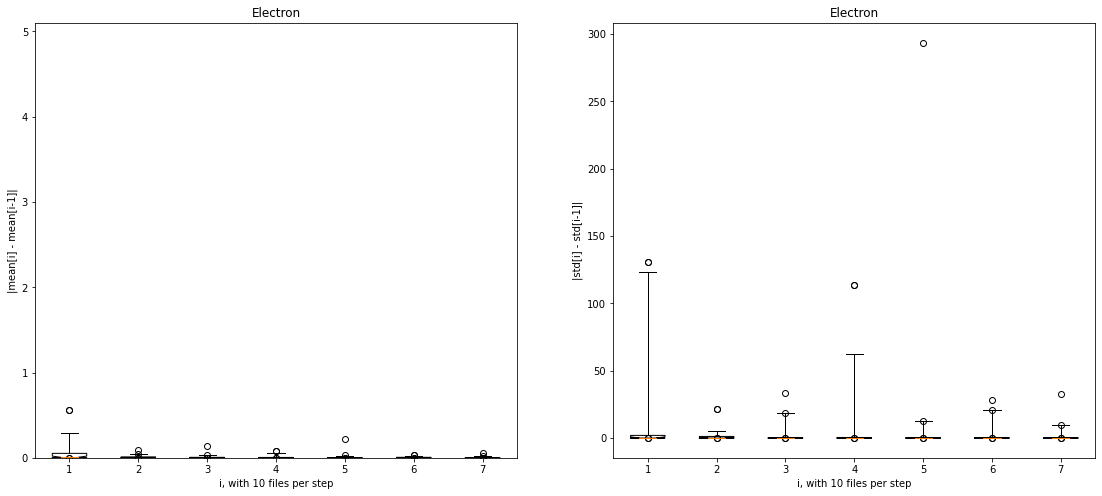

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(19,8))
axs[0].boxplot(list(running_diff_mean.values), notch=True, bootstrap=2000, whis=(5, 95))
axs[0].set_ylim(0, 5.1)
axs[0].set_title(var_type)
axs[0].set_ylabel('|mean[i] - mean[i-1]|')
axs[0].set_xlabel('i, with 10 files per step')
# axs[0].hlines(0.01, 0, 10)
#
axs[1].boxplot(list(running_diff_std.values), notch=True, bootstrap=10000, whis=(5, 95))
# axs[1].set_ylim(0, 50.5)
axs[1].set_title(var_type)
axs[1].set_ylabel('|std[i] - std[i-1]|')
axs[1].set_xlabel('i, with 10 files per step')
# axs[1].hlines(0.01, 0, 10)
plt.show()